# Classfication

## DecisionTree

### Characteristic of DT

In [2]:
'''
Pros:
Easy and Intuitive to understand Algorithm
Significant Rule of Algorithm -> Visualization
No need to make particular preprocessing(Scaling, Regularization)

Cons:
OVERFITTING
->Hyperparameter(ex. max_depth...) Tuning!
'''

'\nPros:\nEasy and Intuitive to understand Algorithm\nSignificant Rule of Algorithm -> Visualization\nNo need to make particular preprocessing(Scaling, Regularization)\n\nCons:\nOVERFITTING\n->Hyperparameter(ex. max_depth...) Tuning!\n'

### Parameters of DecisionTree

In [3]:
'''
min_samples_split: # of minimum sample data to split nodes. Default=2
min_samples_leaf: # of minimum sample data to be leaf. Default=1
max_features: # of feature to consider. Default=None. 
              if max_feature=int, it means # of feature. if max_feature=float, it means % of feature
              if max_feature=sqrt, it means sqrt(# of feature).(=auto do same job)
              if max_feature=log, it means log2(# of feature)
max_depth: Maximum depth of DT. Default=None
max_leaf_nodes: Max # of leaf
'''

'\nmin_samples_split: # of minimum sample data to split nodes. Default=2\nmin_samples_leaf: # of minimum sample data to be leaf. Default=1\nmax_features: # of feature to consider. Default=None. \n              if max_feature=int, it means # of feature. if max_feature=float, it means % of feature\n              if max_feature=sqrt, it means sqrt(# of feature).(=auto do same job)\n              if max_feature=log, it means log2(# of feature)\nmax_depth: Maximum depth of DT. Default=None\nmax_leaf_nodes: Max # of leaf\n'

### DT Visualization by Grapviz!

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
from sklearn.tree import export_graphviz

#make tree.dot file and export by graphviz
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

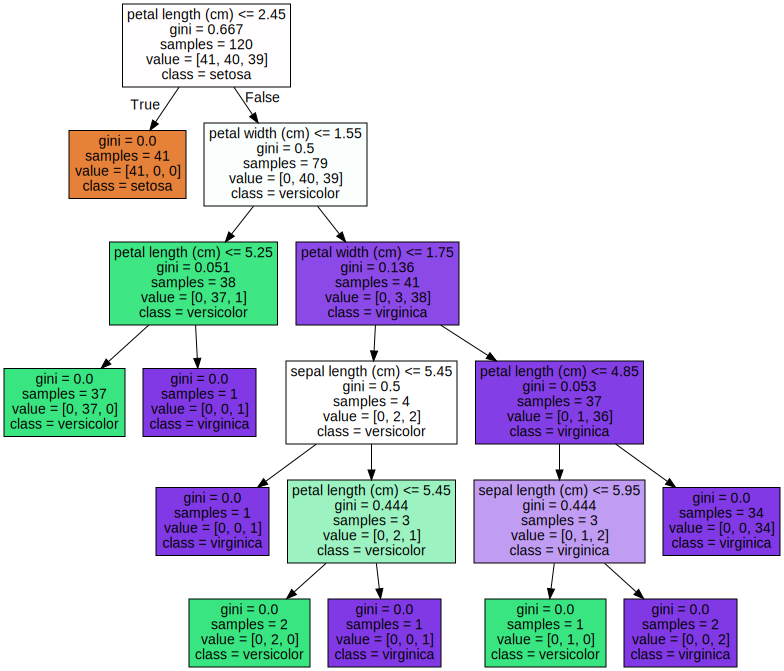

In [6]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [7]:
#Lets control parameters!
def parameter_test(max_depth=None, min_samples_split=2, min_samples_leaf=1):
    dt_clf1 = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, random_state=156)

    X_train, X_test, Y_train, Y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

    dt_clf1.fit(X_train, Y_train)
    export_graphviz(dt_clf1, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

    with open('tree.dot') as f:
        dot_graph = f.read()

    return graphviz.Source(dot_graph)

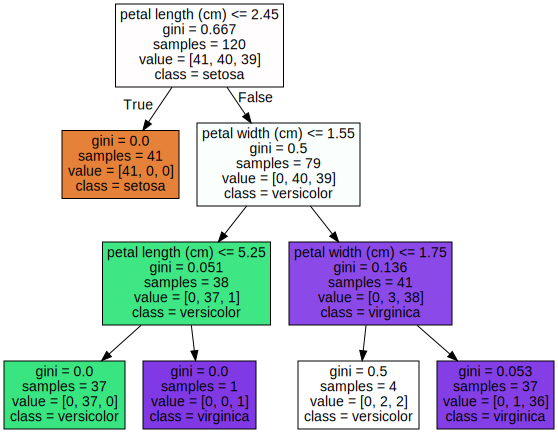

In [8]:
#parameter tuning: max_depth
parameter_test(max_depth=3)

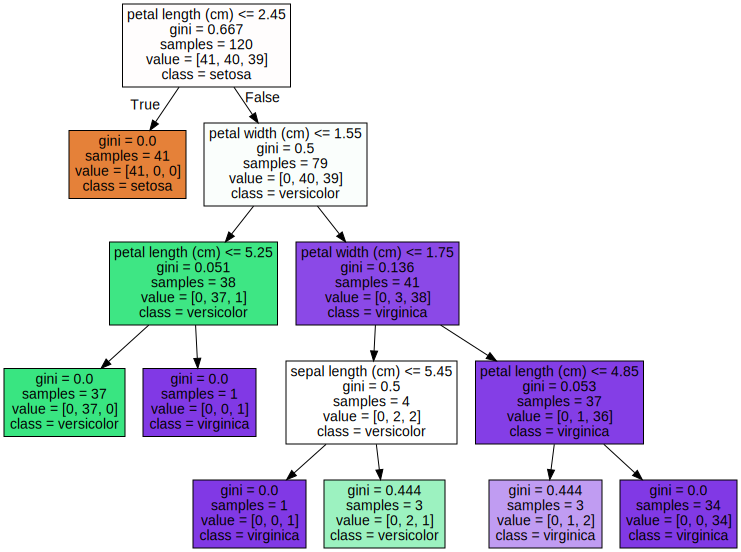

In [9]:
#parameter tuning: min_samples_split
parameter_test(min_samples_split=4)

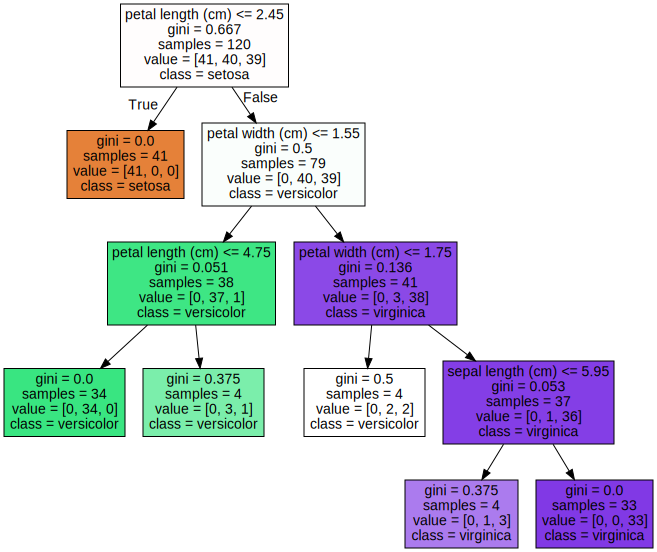

In [10]:
parameter_test(min_samples_leaf=4)

### DT Feature Importance

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<AxesSubplot:>

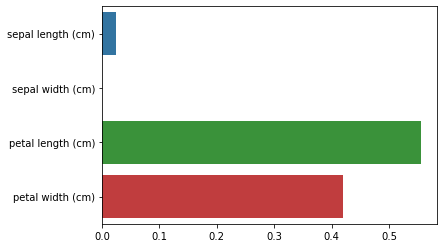

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:')
print(np.round(dt_clf.feature_importances_, 3))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{}: {:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### Overfitting in DecisionTree

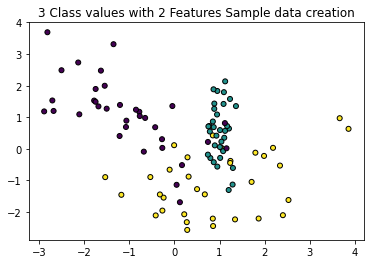

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, Y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=Y_labels, s=25, edgecolor='k')

In [13]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

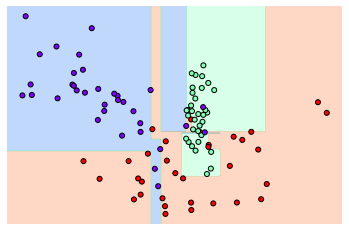

In [14]:
dt_clf = DecisionTreeClassifier().fit(X_features, Y_labels)
visualize_boundary(dt_clf, X_features, Y_labels)

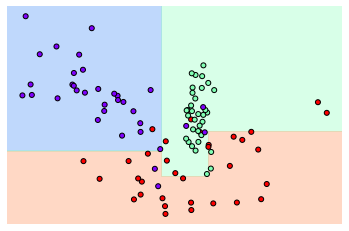

In [15]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, Y_labels)
visualize_boundary(dt_clf, X_features, Y_labels)

### Practice DT! - by Human Activity Recognition Dataset

In [16]:
import pandas as pd

feature_name_df = pd.read_csv(r'.\UCI HAR Dataset\features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

feature_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [17]:
feature_name_df.head(10)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [18]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, angle(X,gravityMean) to tGravityAccMag-std()
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   column_index  477 non-null    int64
dtypes: int64(1)
memory usage: 7.5+ KB


In [19]:
feature_dup_df[feature_dup_df['column_index'] >= 2].count()

column_index    42
dtype: int64

In [20]:
feature_dup_df[feature_dup_df['column_index'] >= 2].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [21]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])

    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply\
                                        (lambda x: x[0]+'_'+str(x[1]) if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df
get_new_feature_name_df(feature_name_df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
 2   dup_cnt       561 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.5+ KB


In [28]:
def get_human_dataset():
    feature_name_df = pd.read_csv(r'.\UCI HAR Dataset\features.txt', sep='\s+', 
                                  header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv(r'.\UCI HAR Dataset\train\X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv(r'.\UCI HAR Dataset\test\X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv(r'.\UCI HAR Dataset\train\y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv(r'.\UCI HAR Dataset\test\y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [30]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [31]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   action  7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB


In [39]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy Score:', accuracy)

Accuracy Score: 0.8547675602307431


In [43]:
print('DecisionTreeClassifier Default Hyperparameters:\n', dt_clf.get_params(), sep='')

DecisionTreeClassifier Default Hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [44]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(estimator=dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('The highest accuracy score by GridSearchCV:', np.round(grid_cv.best_score_, 4))
print('Optimal Hyperparameter:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
The highest accuracy score by GridSearchCV: 0.8513
Optimal Hyperparameter: {'max_depth': 16}


In [47]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [49]:
max_depth = [6,8,10,12,16,20,24]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth: {} --> accuracy: {:.4f}'.format(depth, accuracy))

max_depth: 6 --> accuracy: 0.8558
max_depth: 8 --> accuracy: 0.8707
max_depth: 10 --> accuracy: 0.8673
max_depth: 12 --> accuracy: 0.8646
max_depth: 16 --> accuracy: 0.8575
max_depth: 20 --> accuracy: 0.8548
max_depth: 24 --> accuracy: 0.8548


In [50]:
params = {'max_depth':[8,12,16,20],
          'min_samples_split':[16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('The highest accuracy score by GridSearchCV:', np.round(grid_cv.best_score_, 4))
print('Optimal Hyperparameter:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The highest accuracy score by GridSearchCV: 0.8549
Optimal Hyperparameter: {'max_depth': 8, 'min_samples_split': 16}


In [52]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('Accuracy Score:', accuracy)

Accuracy Score: 0.8717339667458432


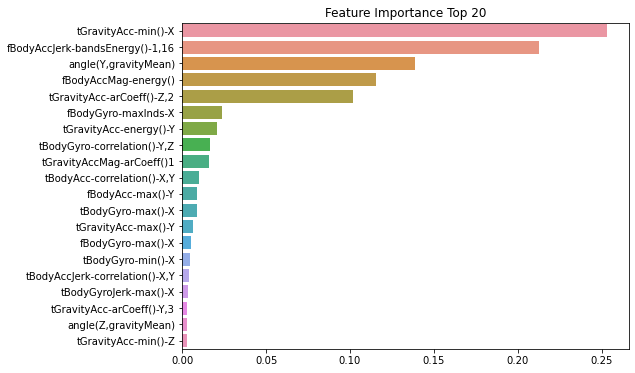

In [53]:
feature_importance_values = best_dt_clf.feature_importances_
feature_importance_series = pd.Series(feature_importance_values, index=X_train.columns)
feature_importance_top20 = feature_importance_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=feature_importance_top20, y=feature_importance_top20.index)
plt.show()